# Diffusion-reaction systems with environment-dependent transition rates

## Introduction

Here we focus on a two-state system. The concentration of these two states are denoted as $u$ and $v$, respectively. For such system, reaction between two states is allowed as spontaneous transition
$$
U\leftrightharpoons V
$$
Note that here due to the existence of interaction between two species, the transition rates depends on local concentrations. Thermodynamic consistency requires these two rates satisfy the following condition
$$
\frac{k_+}{k_-}=\exp\left(-\frac{\mu_u-\mu_v}{k_BT}\right)
$$
Here $\mu_u$ and $\mu_v$ comes from the local concentrations
$$
\mu_u\equiv \mu_u(u,v)\quad \mu_v\equiv \mu_v(u,v)
$$
By consider linear interaction, we have
$$
\vec{\mu} = \vec{\sigma }\cdot\vec{\mu}
$$
which can be write in a more explicit form
$$
\begin{pmatrix}
\mu_u\\
\mu_v
\end{pmatrix}
=
\begin{pmatrix}
\sigma_{uu}&\sigma_{uv}\\
\sigma_{vu}&\sigma_{vv}
\end{pmatrix}
\begin{pmatrix}
\mu_u\\
\mu_v
\end{pmatrix}
$$
Then, putting reactions and diffusion together, we find the following reaction-diffusion equation
$$
\begin{aligned}
\frac{\partial u}{\partial t}&=-D_u\nabla^2u+k_{uv} v - k_{vu}u\\
\frac{\partial u}{\partial t}&=-D_v\nabla^2v + k_{vu}u-k_{uv} v
\end{aligned}
$$

## Diffusion-reaction Ising


$$
\begin{aligned}
\frac{\partial u}{\partial t}&=-D_u\nabla^2u+k_{uv} v - k_{vu}u\\
\frac{\partial u}{\partial t}&=-D_v\nabla^2v + k_{vu}u-k_{uv} v
\end{aligned}
$$

where the reaction rates is determined by the local interaction. As the interaction is Ising-like, we have
$$
\vec{\sigma } =\begin{pmatrix}
-J&J\\
J&-J
\end{pmatrix}
$$

$$
\mu_u=-J(u-v)\quad
 \mu_v = -J(v-u)
$$

If neglecting energetic barriers, the transition rates reads

$$
k_{uv}= k_0e^{\mu_v/k_BT}=k_0\exp\left(-\frac{J(v-u)}{k_BT}\right)\\ 
k_{vu}= k_0e^{\mu_u/k_BT}=k_0\exp\left(-\frac{J(u-v)}{k_BT}\right)
$$

## Simulation

In [1]:
import sys
sys.path.append('..')


#from rdsolver import turing_pattern as tNp
#dir(rds)
from rdsolver.reaction_diffu import *

In [2]:
class IsingRD(RDSystem):
    def __init__(self,
                 Db = 2e-2, Dc =1e-2,
                 J = 1,
                 k0 = 1,
                 space_size = 30,
                 dim = 2,
                 dt=0.01,
                 boundary = 'periodic',
                 init_dis= 'random',
                 *args):
        self.J, self.k0 = (J, k0)
        Reactant1 = Reactant(Db)
        Reactant2 = Reactant(Dc)
        reactants = [Reactant1,Reactant2]
        RDSystem.__init__(
        self,reactants,
        space_size =space_size, 
        init_dis = init_dis ,
        boundary = boundary, dim=dim,dt=dt)
        self.dx = 1
        self.dis[0,:,:] = np.random.random_sample(self.dis[0,:,:].shape)
        self.dis[1,:,:] = np.random.random_sample(self.dis[1,:,:].shape)
        
    def reaction(self):
        u = self.dis
        dudt_reac = np.zeros(np.shape(self.dis))      
        if self.dim==2: #2D 
            dudt_reac[0,:,:] += self.k0 *(- np.exp(-(u[0]-u[1])*self.J) * u[0] + np.exp(-(u[1]-u[0])*self.J)*u[1])
            dudt_reac[1,:,:] += self.k0 *(  np.exp(-(u[0]-u[1])*self.J) * u[0] - np.exp(-(u[1]-u[0])*self.J)*u[1])
        return dudt_reac

In [57]:
IsingSys = IsingRD(
                 Db = 4e-1, Dc =1e-1,
                 J = 1,
                 k0 = 1,
                 space_size = 40)
#Turing_1.stationary()

In [58]:
t=np.linspace(0,200,10)
time_series = IsingSys.integrate(t);

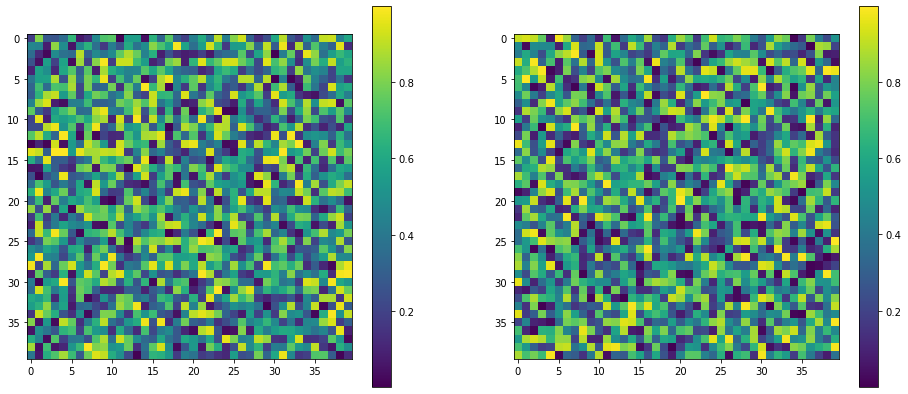

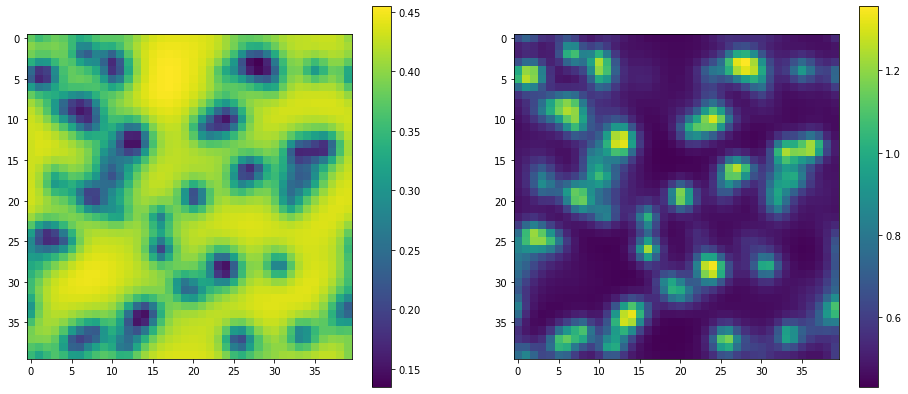

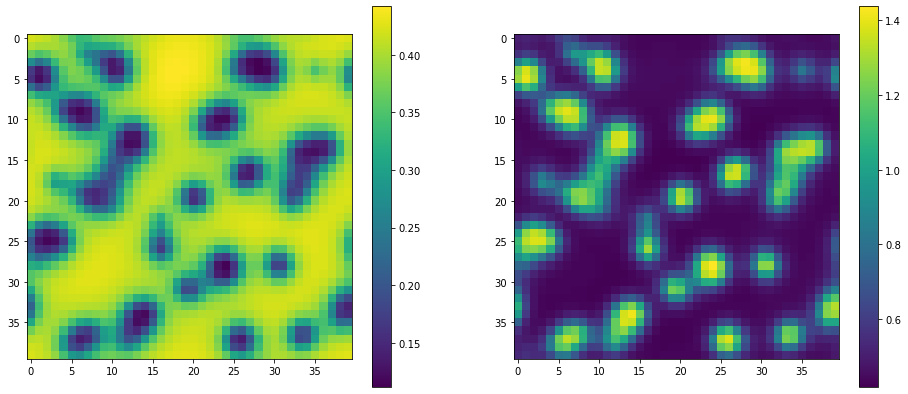

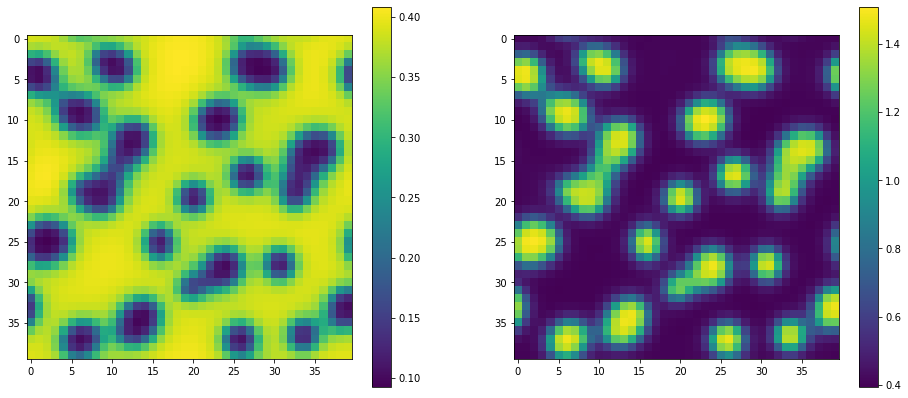

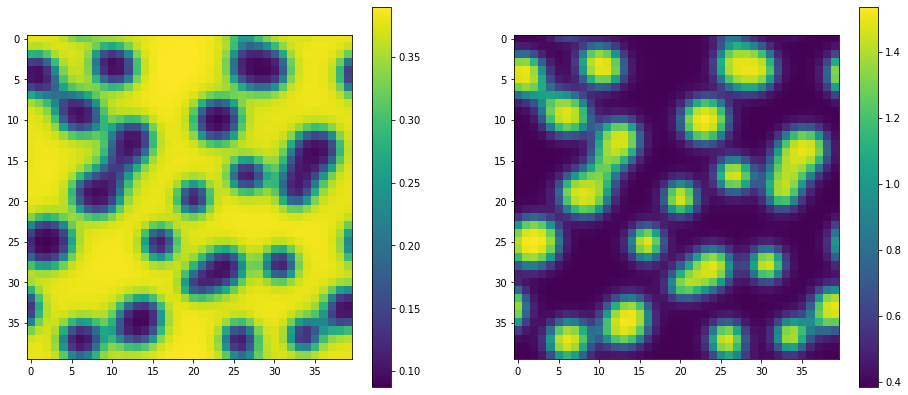

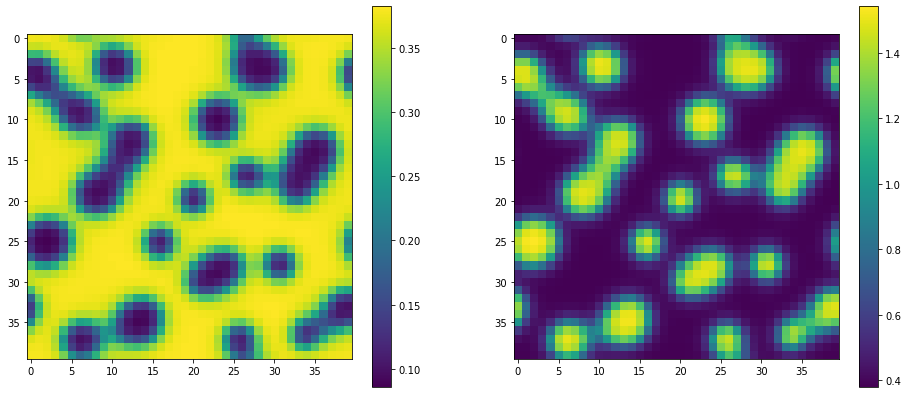

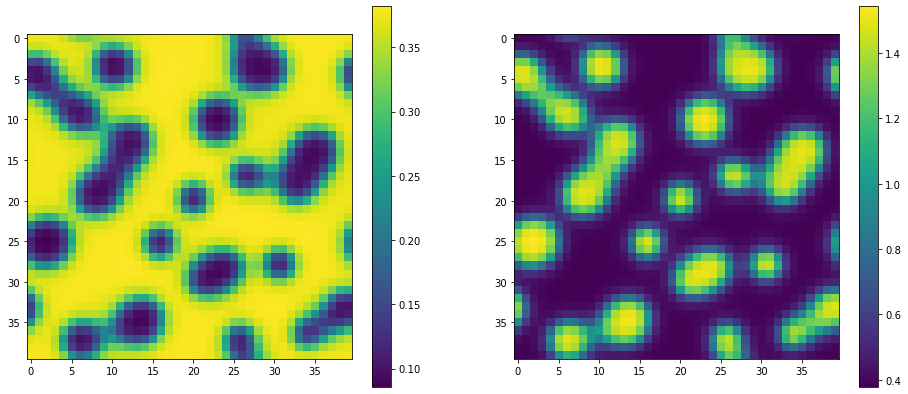

In [59]:
for times in [0,1,2,4,6,8,9]:
    fig, (ax1,ax2) = plt.subplots(figsize = (16,7), nrows=1, ncols=2)
    p1 = ax1.imshow(time_series[times].reshape((2,40,40))[0,:,:])
    #ax1.colorbar()
    fig.colorbar(p1, ax=ax1)
    p2 = ax2.imshow(time_series[times].reshape((2,40,40))[1,:,:])
    fig.colorbar(p2, ax=ax2)
    #fig.colorbar()
    plt.show()